<a href="https://colab.research.google.com/github/rudeboybert/SDS390/blob/master/PS/PS02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Set 02

Instructions:
1. Name: Chi Qiu
1. Create a new ChatGPT chat called "SDS390 PS02" that contains all the prompts you used for this problem set, click the share button, and paste the URL in Markdown format [here](https://chat.openai.com/share/ef32311b-841d-46c4-924d-abbb6c2fe9ce)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose

# 1. Load and explore data
1. Load the CSV data of biweekly dendroband measures for tree with tag 82203
1. Look at the raw data (rows and variables) and meta-data as Amir always told me to do
1. Note that DBH is the only non-index variable we will work with, thus simplify the data frame to only have this variable
1. Plot the time series of DBH (diameter at breast height, in mm) as we've done numerous times in DataCamp: just using `.plot()` with no arguments
1. Now plot the time series where each of the 147 observed data point is marked with a dot. In other words, your plot should at the very least have these [points](https://github.com/rudeboybert/SDS390/blob/master/PS/tag_82203_plot.pdf).
1. What is the difference in information presented between the two plots? 
1. Describe any patterns you observe in the time series where each observed data point is marked with a dot

In [41]:
# Load the CSV data
df = pd.read_csv('tag_82203.csv', parse_dates=['date'], index_col='date')

# Simplify the data frame to only have DBH variable
df = df[['dbh']]

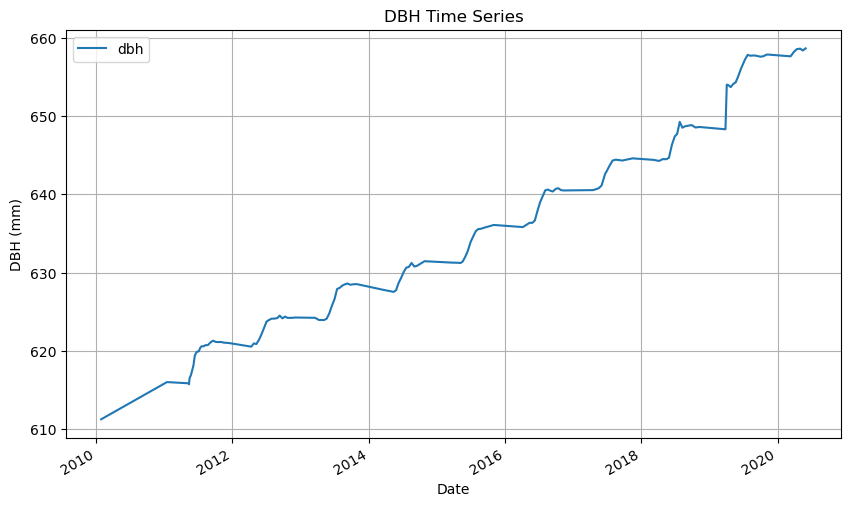

In [7]:
# Source: ChatGPT
# Plot the time series of DBH
df.plot(figsize=(10, 6))
plt.xlabel('Date')
plt.ylabel('DBH (mm)')
plt.title('DBH Time Series')
plt.grid(True)
plt.show()

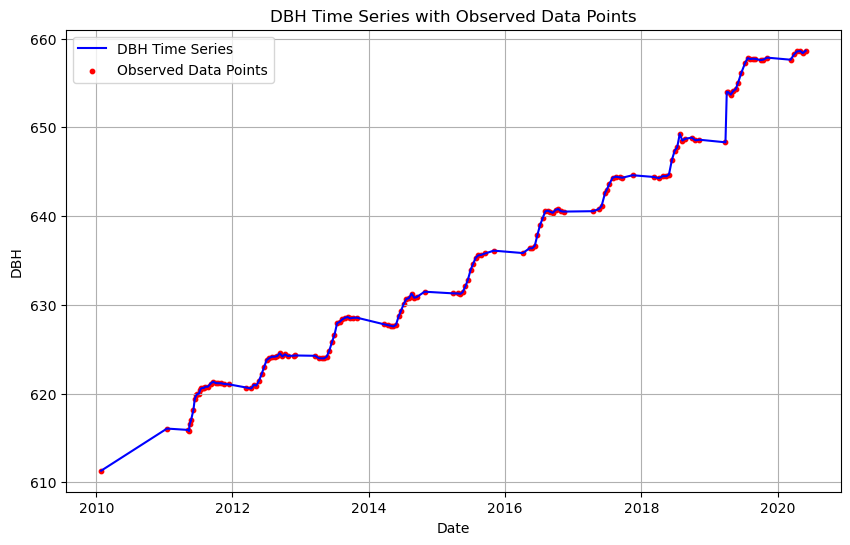

In [8]:
# Source: ChatGPT
# Plot the time series with data points marked as dots
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['dbh'], label='DBH Time Series', color='blue')
plt.scatter(df.index, df['dbh'], c='red', marker='o', s=10, label='Observed Data Points')
plt.xlabel('Date')
plt.ylabel('DBH')
plt.title('DBH Time Series with Observed Data Points')
plt.legend()
plt.grid(True)
plt.show()

In the first plot, the plot shows a continuous line throughout the time period. However, in the second plot where it's displayed as a scatter plot, the plot shows that there's some data missing at the end of every year. This tells us that there's usually data missing at the end of each year, whether the bad weather condition might stop people from collecting data.

# 2. Decomposition Plots
Create a seasonal decomposition plot of this data to answer the following questions:
1. What is the approximate growth (in mm) per year trend for this tree
1. What is the approximate range in seasonal variation in growth around this trend?
1. When are the peaks and when are the valleys in this seasonal variation?
1. Are there periods of time where we might be skeptical of the above trend and seasonality?

Note: You may need to do some data transformation as seen in the first DataCamp course to get a valid plot

In [46]:
df.head()

,dbh
date,
2010-01-27,611.300000
2010-01-28,611.313456
2010-01-29,611.326912
2010-01-30,611.340368
2010-01-31,611.353824


In [45]:
# Source: ChatGPT
# Resample to a daily frequency
df = df.resample('D').mean()

# Source: https://www.geeksforgeeks.org/python-pandas-dataframe-interpolate/
# Interpolate missing values linearly
df['dbh'].interpolate(method='linear', inplace=True)

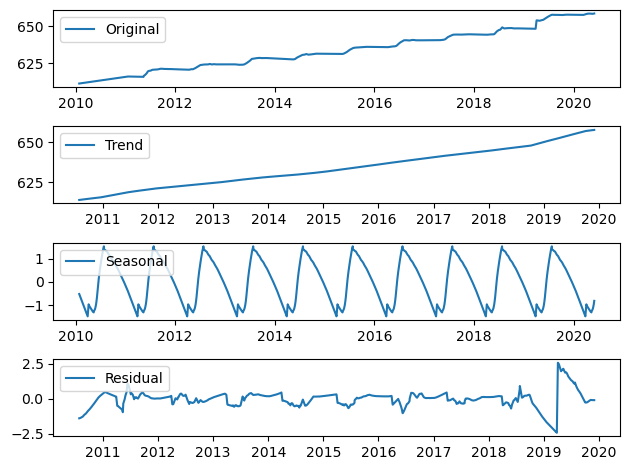

In [10]:
# Source: https://www.section.io/engineering-education/time-series-decomposition-in-python/

# Perform seasonal decomposition using the additive model
decomposition = seasonal_decompose(df['dbh'], model='additive', period=365)

# Extract the components
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot the decomposition results
plt.subplot(411)
plt.plot(df['dbh'], label='Original')
plt.legend(loc='upper left')

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='upper left')

plt.subplot(413)
plt.plot(seasonal, label='Seasonal')
plt.legend(loc='upper left')

plt.subplot(414)
plt.plot(residual, label='Residual')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

What is the approximate growth (in mm) per year trend for this tree
- The approximate growth per year trend is increasing, which is ~5mm/year

What is the approximate range in seasonal variation in growth around this trend?
- The approximate range in seasonal variation in growth is from -1.25 to 1.25

When are the peaks and when are the valleys in this seasonal variation?
- The peaks are usually at around the 3rd quarter of the year (i.e. July), and the valleys are usually at the 1st quarter of the year (i.e. Feburary)

Are there periods of time where we might be skeptical of the above trend and seasonality?
- At the beginning of 2019, there's an obvious drop and surge in the residual graph, meaning that the model doesn't capture the underlying patterns adequately

# 3. Forecasting using an AR(2) model
In this exercise you will use an AR(2) model as seen in the second datacamp course "Time Series Analysis in Python" to forecast this tree's size exactly two years into the future. Unfortunately since we aren't covering ARIMA models until later in the course, we won't be able to:

1. Ascertain the appropriateness of using an AR(2) model. Ex: are all assumptions met?
1. Fully interpret the model output's meaning
1. Diagnose any issues. 

However, we will simply view this code as a minimally viable product that we will improve on later. Instructions:
1. Fit an appropriate AR(2) model
1. Print the summary of the result
1. Plot the TS data along with both in-sample fitted forecasts AND out-of-sample forecasts exactly two years into the future
1. Comment on the quality of the out-of-sample forecast. If you have any ideas on how to improve the forecast state them, if not no problem.

## Method I

In [71]:
# Source: Data Camp
# Fit an AR(2) model
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_predict

mod = ARIMA(df, order=(2,0,0))
res = mod.fit()

In [72]:
# Print the summary of the result
print(res.summary())

                               SARIMAX Results                                
Dep. Variable:                    dbh   No. Observations:                 3778
Model:                 ARIMA(2, 0, 0)   Log Likelihood                9411.044
Date:                Tue, 24 Oct 2023   AIC                         -18814.088
Time:                        10:29:52   BIC                         -18789.140
Sample:                    01-27-2010   HQIC                        -18805.219
                         - 05-31-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        633.8438   1.51e-09    4.2e+11      0.000     633.844     633.844
ar.L1          1.8933      0.001   2352.900      0.000       1.892       1.895
ar.L2         -0.8933      0.001  -1109.748      0.0

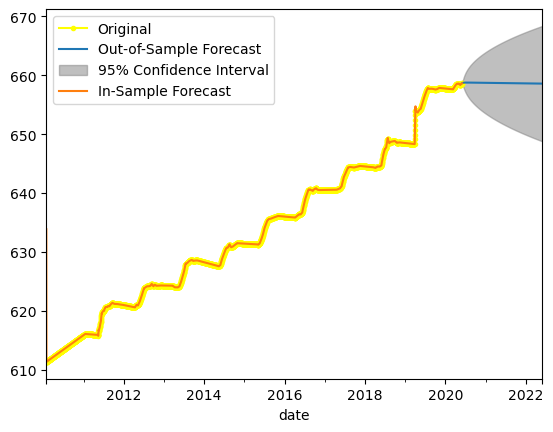

In [73]:
# In-sample & Out-of-sample forecasts

fig, ax = plt.subplots()
df['2010':].plot(ax=ax, label='Original', marker='o', markersize=3, color='yellow')

plot_predict(res, start='2020-06-01', end='2022-06-01', ax=ax)
plot_predict(res, start='2010-01-27', end='2020-06-01', ax=ax, alpha=None)

plt.legend(["Original", "Out-of-Sample Forecast", "95% Confidence Interval", "In-Sample Forecast"])
plt.show()

## Method II

In [85]:
# Source: ChatGPT
# Fit an AR(2) model
model = sm.tsa.AutoReg(df['dbh'], lags=2)
results = model.fit()

In [86]:
# Print the summary of the result
print(results.summary())

                            AutoReg Model Results                             
Dep. Variable:                    dbh   No. Observations:                 3778
Model:                     AutoReg(2)   Log Likelihood                9422.887
Method:               Conditional MLE   S.D. of innovations              0.020
Date:                Mon, 23 Oct 2023   AIC                         -18837.775
Time:                        16:59:57   BIC                         -18812.829
Sample:                    01-29-2010   HQIC                        -18828.906
                         - 05-31-2020                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0017      0.016      0.105      0.916      -0.029       0.032
dbh.L1         1.8840      0.008    247.624      0.000       1.869       1.899
dbh.L2        -0.8840      0.008   -116.183      0.0

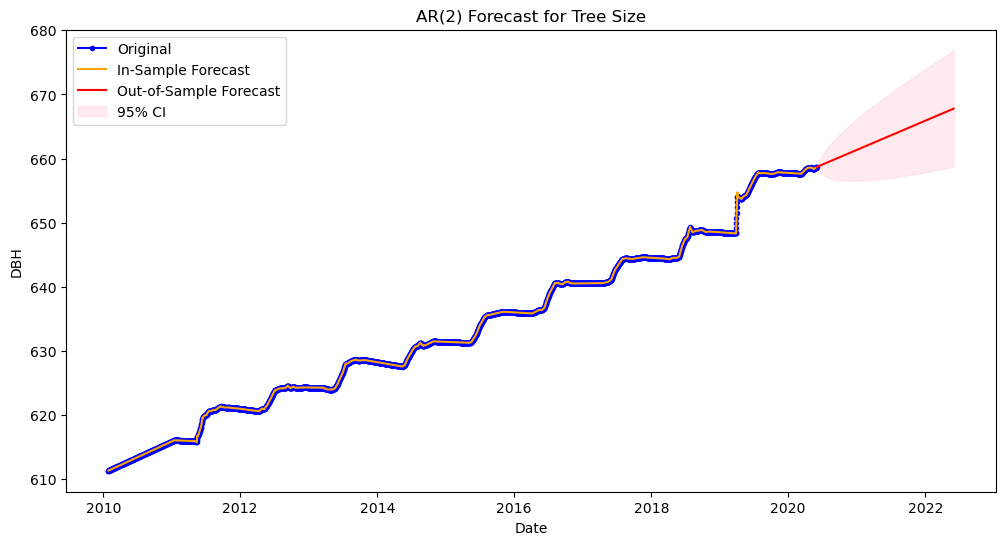

In [104]:
# In-sample fitted forecasts
pred_insample = results.fittedvalues

# Out-of-sample forecasts
forecast_outsample = results.get_prediction(start=len(df), end=len(df) + 730)  # 730 days = 2 years * 365 days

# Get forecast values and confidence intervals
forecast_mean = forecast_outsample.predicted_mean
forecast_conf_int = forecast_outsample.conf_int()

# Plot the data and forecasts
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['dbh'], label='Original', linestyle='-', marker='o', markersize=3, color='blue')
plt.plot(pred_insample.index, pred_insample, label='In-Sample Forecast', color='orange')
plt.plot(forecast_mean.index, forecast_mean, label='Out-of-Sample Forecast', color='red')

# Fill the area between the confidence intervals
plt.fill_between(forecast_conf_int.index, forecast_conf_int.iloc[:, 0], forecast_conf_int.iloc[:, 1], color='pink', alpha=0.3, label='95% CI')

plt.xlabel('Date')
plt.ylabel('DBH')
plt.legend()
plt.title('AR(2) Forecast for Tree Size')
plt.show()

Comment on the quality of the out-of-sample forecast. If you have any ideas on how to improve the forecast state them, if not no problem.
- Both forecasts fall within the 95% confidence interval, thus both are reliable. But the first CI is much wider than the second CI, thus the forecast quality might be lower
- The second method provides a better forecast given its increasing trend
- After running the first method, I ran the second method through ChatGPT to explore other model options that will improve the quality